In [472]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [473]:
# Get the name of the GPU device --> just making sure tensorflow will use the GPU for training
gpu_name = tf.test.gpu_device_name()

if gpu_name == '':
    print("No GPU found")
else:
    print(f"GPU found: {gpu_name}")


GPU found: /device:GPU:0


I0000 00:00:1739399455.528238   41552 gpu_device.cc:2022] Created device /device:GPU:0 with 9511 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [474]:
# Microsoft
# Start and end date choose to get all the data available 
symbol = 'MSFT' 
start_date = '2020-01-01'  
end_date = '2030-01-01' 
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [475]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.630707,153.735921,151.440361,151.870777,22622100
2020-01-03,151.717743,152.989871,151.182113,151.430809,21116200
2020-01-06,152.109833,152.176794,149.699486,150.244690,20813700
2020-01-07,150.723007,152.722059,150.474326,152.387297,21634100
2020-01-08,153.123764,153.802875,151.076886,152.014237,27746500


In [476]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_reverse = MinMaxScaler(feature_range=(0, 1))

In [477]:
close_df = df.xs('Close', level=0, axis=1)
high_df = df.xs('High', level=0, axis=1)
low_df = df.xs('Low', level=0, axis=1)
open_df = df.xs('Open', level=0, axis=1)
volume_df = df.xs('Volume', level=0, axis=1)

In [478]:
dates = close_df.index
close = close_df.values
high = high_df.values
low = low_df.values
open = open_df.values
volume = volume_df.values

dates = np.array(dates).flatten()
open = np.array(open).flatten()
high = np.array(high).flatten()
low = np.array(low).flatten()
close = np.array(close).flatten()
volume = np.array(volume).flatten()

In [479]:
# 'Date': dates, 'Close': close, 'High': high, 'Low': low, 'Open': open, 'Volume': volume
data = pd.DataFrame({'Date': dates, 'Close': close, 'High': high, 'Low': low, 'Open': open, 'Volume': volume})
data.index = data.pop('Date')

In [480]:
data.sample(5)

,Close,High,Low,Open,Volume
Date,,,,,
2020-05-18,177.346832,178.584062,176.435692,178.152471,35264500
2022-02-28,291.838928,292.180792,286.183619,287.463141,34627500
2023-02-24,245.810211,247.565856,244.705540,246.540092,24990900
2020-12-21,215.159546,216.522481,210.026806,210.287797,37181900
2021-04-06,240.137772,241.629785,239.188308,239.895561,22931900


In [481]:
data = scaler.fit_transform(data)
scaler_reverse.fit(df[['Close']])
data = pd.DataFrame(data, columns=['Close', 'High', 'Low', 'Open', 'Volume'])	

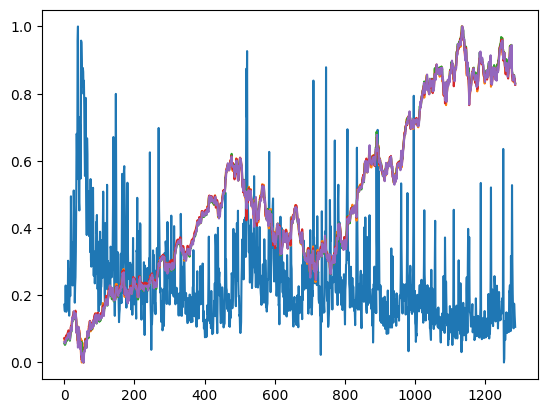

In [482]:
plt.plot(data.index, data['Volume'])
plt.plot(data.index, data['Close'])
plt.plot(data.index, data['High'])
plt.plot(data.index, data['Low'])
plt.plot(data.index, data['Open'])

In [483]:
def rolling_window(dataframe: pd.DataFrame, window_size: int, features: int) -> pd.DataFrame:
    """
    Create a rolling window of the dataframe
    window_size: the size of the window (the amount of previous data to consider for each prediction)
    Probably will drop volume from the present day
    """
    df = dataframe.copy()
    for i in range(1, window_size + 1):
        for col in ['Close', 'High', 'Low', 'Open', 'Volume']:	
            df[f'{col}_shifted_{i}'] = df[col].shift(i)
    df.dropna(inplace=True)
    cols = df.columns.to_list()
    col = cols[features:] + cols[:1]
    df = df[col]
    data_reset = df.reset_index()
    data_reset.head()
    
    return data_reset

In [484]:
test = rolling_window(data, 20, 5)

/tmp/ipykernel_41552/1053613049.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_shifted_{i}'] = df[col].shift(i)


In [485]:
test.head()

,index,Close_shifted_1,High_shifted_1,Low_shifted_1,Open_shifted_1,Volume_shifted_1,Close_shifted_2,High_shifted_2,Low_shifted_2,Open_shifted_2,...,High_shifted_19,Low_shifted_19,Open_shifted_19,Volume_shifted_19,Close_shifted_20,High_shifted_20,Low_shifted_20,Open_shifted_20,Volume_shifted_20,Close
0,20,0.105329,0.095420,0.108041,0.105057,0.494534,0.091832,0.080139,0.093506,0.087263,...,0.054768,0.071760,0.059986,0.155281,0.070703,0.057017,0.072529,0.061304,0.172041,0.098068
1,21,0.098068,0.090663,0.104593,0.099785,0.322524,0.105329,0.095420,0.108041,0.105057,...,0.052317,0.067342,0.056433,0.151914,0.065008,0.054768,0.071760,0.059986,0.155281,0.109885
2,22,0.109885,0.096718,0.106930,0.094685,0.255347,0.098068,0.090663,0.104593,0.099785,...,0.053961,0.069651,0.062852,0.161045,0.066176,0.052317,0.067342,0.056433,0.151914,0.126229
3,23,0.126229,0.114420,0.123774,0.113910,0.325758,0.109885,0.096718,0.106930,0.094685,...,0.057219,0.071446,0.061734,0.229075,0.062047,0.053961,0.069651,0.062852,0.161045,0.125603
4,24,0.125603,0.124684,0.129759,0.133652,0.356399,0.126229,0.114420,0.123774,0.113910,...,0.061313,0.080224,0.070072,0.158273,0.069194,0.057219,0.071446,0.061734,0.229075,0.136224


In [486]:
def window_x_y_shape(dataframe: pd.DataFrame, features: int, window_size: int) -> (np.array, np.array):
    """
    Split the dataframe into X and y
    X: the input data
    y: the output data
    """
    df_as_np = dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    
    # Ensure the reshape is possible
    expected_elements = len(dates) * window_size * features
    actual_elements = middle_matrix.size
    
    if actual_elements != expected_elements:
        raise ValueError(f"Cannot reshape array of size {actual_elements} into shape ({len(dates)}, {window_size}, {features})")
    
    X = middle_matrix.reshape((len(dates), window_size, features))
    y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), y.astype(np.float32)

In [487]:
dates, X, y = window_x_y_shape(test, 5, 20)
dates.shape, X.shape, y.shape

((1266,), (1266, 20, 5), (1266,))

In [488]:
q_80 = int(0.8 * len(dates))
q_90 = int(0.9 * len(dates))

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

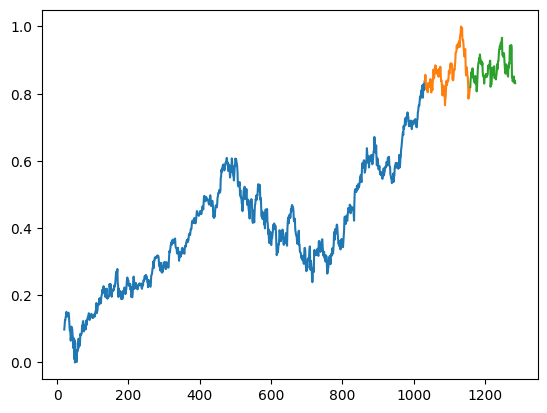

In [489]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

## Model Training

In [490]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.metrics import MeanAbsoluteError

In [491]:
X_train.shape[1], X_train.shape[2]

(20, 5)

In [492]:
model = Sequential([layers.Input(shape=(X_train.shape[1], X_train.shape[2])), 
                    layers.LSTM(64), 
                    layers.Dense(32, activation='linear'), 
                    layers.Dense(32, activation='linear'), 
                    layers.Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mae',
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,089 (82.38 KB)

 Trainable params: 21,089 (82.38 KB)

 Non-trainable params: 0 (0.00 B)

In [494]:
%%time
# Initialize the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model/best_model_2020_20.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/100
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 1: val_loss improved from inf to 0.10547, saving model to model/best_model_2020_20.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.0239 - mean_absolute_error: 0.0239 
Epoch 2: val_loss improved from 0.10547 to 0.03750, saving model to model/best_model_2020_20.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375
Epoch 3/100
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 3: val_loss did not improve from 0.03750
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.1130 - val_mean_absolute_error: 0.1130
Epoch 4/100
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 4: val_loss did not improve from 0.03750
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574
Epoch 5/100
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 5: val_loss did not improve from 0.03750
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0533 - val_mean_absolute_error: 0.0533
Epoch 6/100
32/3

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 8: val_loss did not improve from 0.02610
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 9/100
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 9: val_loss did not improve from 0.02610
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439
Epoch 10/100
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 10: val_loss did not improve from 0.02610
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - val_loss: 0.0908 - val_mean_absolute_error: 0.0908
Epoch 11/100
2

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242
Epoch 14/100
29/32 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 14: val_loss improved from 0.02424 to 0.02315, saving model to model/best_model_2020_20.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 15/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 15: val_loss did not improve from 0.02315
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - val_loss: 0.0696 - val_mean_absolute_error: 0.0696
Epoch 16/100
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 16: val_loss did not improve from 0.02315
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265
Epoch 17/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 17: val_loss did not improve from 0.02315
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.0763 - val_mean_absolute_error: 0.0763
Epoch 18/1

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 23/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180 - mean_absolute_error: 0.0180
Epoch 23: val_loss did not improve from 0.02221
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 24/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 24: val_loss did not improve from 0.02221
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271
Epoch 25/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 25: val_loss did not improve from 0.02221
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - val_loss: 0.0533 - val_mean_absolute_error: 0.0533
Epoch 26/1

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 27/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0188 - mean_absolute_error: 0.0188
Epoch 27: val_loss did not improve from 0.02083
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 28/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0164 - mean_absolute_error: 0.0164
Epoch 28: val_loss did not improve from 0.02083
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243
Epoch 29/100
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 29: val_loss did not improve from 0.02083
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 30/1

In [500]:
# Load the best model
mae = MeanAbsoluteError()
model = load_model('model/best_model_2020_20.h5', custom_objects={'mae': mae})

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


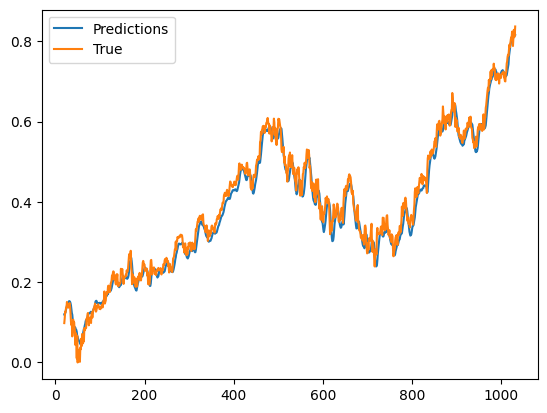

In [501]:

train_predictions =  model.predict(X_train)
train_predictions_true = scaler_reverse.inverse_transform(train_predictions)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Predictions', 'True'])

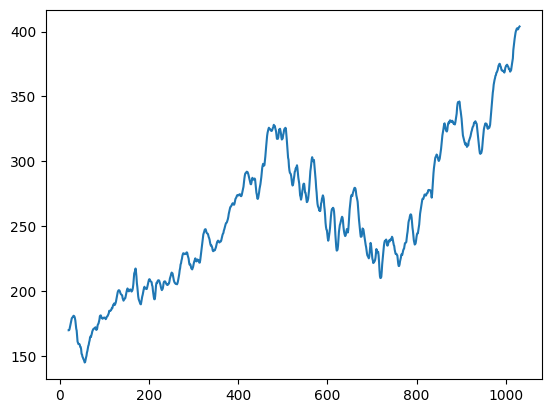

In [502]:
plt.plot(dates_train, train_predictions_true)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


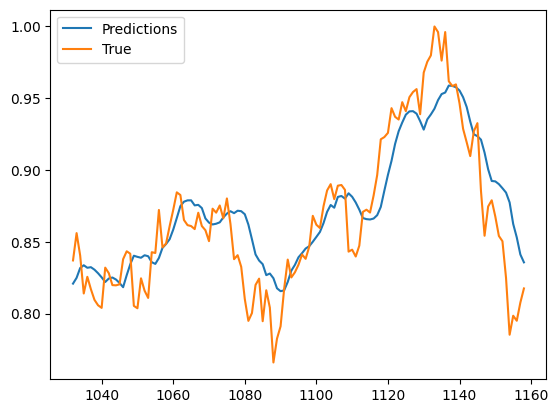

In [503]:
val_predictions =  model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Predictions', 'True'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


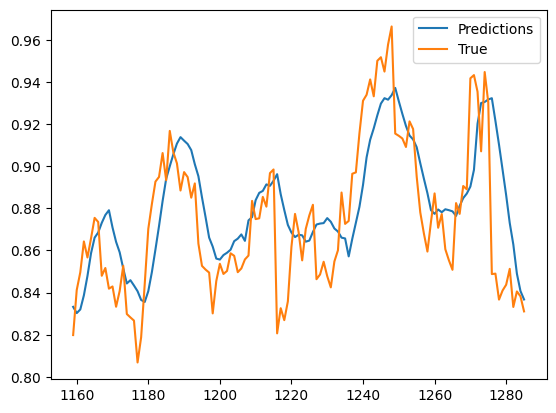

In [504]:
test_predictions =  model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Predictions', 'True'])